- Choose Stakeholder: For whom are you performing this analysis (Every Door Real Estate)
- Business Understanding: at least 2 important parameters estimates as recomendations
- Data Understanding: Whats in this data, how relevant is this data
- Data Prep: Train/Test split, Nulls, Duplicates, Outlires, Log transformation, encoding variables (one-hot-encoding, binning), polynomial features, interation terms, SCALE
- At least one non numaric feature included in a model
- First simple model: what is your model-less baseline
- Interactive Modeling: Iterate by adding complexity( more columns, different interations:
- Each iteration of your model adheres to assumptions of liniear reg
    Linear Relationship, low Multicollinearity(VIF), Normal dis of   Errors(Q-Qplot)(lower the score the more), Homoskedasticity of Errors
- Interpreting models: check if your input variables are statistically significant. R2. 

In [127]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from sklearn.model_selection import cross_validate, ShuffleSplit
import statsmodels.api as sm

In [208]:
df = pd.read_csv('data/kc_house_data.csv')
train = pd.read_csv('data/kc_house_data.csv')
test = pd.read_csv('data/kc_house_data.csv')
X_train = train.drop("price", axis=1)
y_train = train["price"]
X_test = test.drop("price", axis=1)
y_test = test["price"]
train.sort_values('price')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15279,40000362,5/6/2014,78000.0,2,1.00,780,16344,1.0,NO,NONE,...,5 Fair,780,0.0,1942,NaN,98168,47.4739,-122.280,1700,10387
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,NaN,NONE,...,4 Low,430,0.0,1912,0.0,98014,47.6499,-121.909,1200,7500
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,NaN,NONE,...,5 Fair,730,0.0,1943,0.0,98168,47.4808,-122.315,860,9000
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,NO,NONE,...,6 Low Average,860,0.0,1954,0.0,98146,47.4987,-122.341,1140,11250
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,NO,NONE,...,5 Fair,520,0.0,1951,0.0,98168,47.4799,-122.296,1572,10570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,NO,EXCELLENT,...,12 Luxury,6720,1280.0,2009,0.0,98004,47.6232,-122.220,4600,21750
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,NO,NONE,...,13 Mansion,6200,3000.0,2001,NaN,98039,47.6289,-122.233,3560,24345
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,NO,EXCELLENT,...,13 Mansion,8860,1030.0,2001,0.0,98039,47.6305,-122.240,4540,42730
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,YES,AVERAGE,...,11 Excellent,7680,2360.0,1940,2001.0,98004,47.6500,-122.214,3930,25449


In [189]:
X_train.isnull().sum()

id                  0
date                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [190]:
X_train.corr()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
bedrooms,0.001150,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
sqft_above,-0.010799,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077
yr_built,0.021617,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777
yr_renovated,-0.012010,0.018495,0.051050,0.055660,0.004513,0.003535,0.022137,-0.225209,1.000000,0.069846,0.032145,-0.072156,-0.000247,0.003852
zipcode,-0.008211,-0.154092,-0.204786,-0.199802,-0.129586,-0.059541,-0.261570,-0.347210,0.069846,1.000000,0.266742,-0.564259,-0.279299,-0.147294


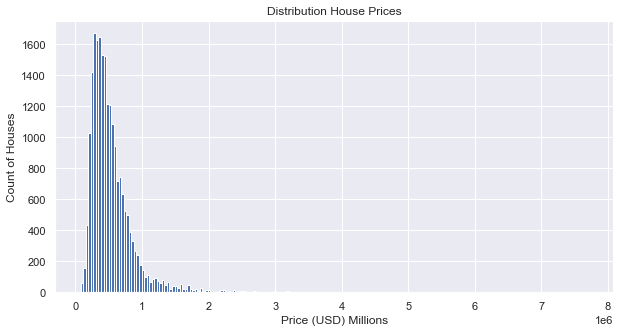

In [191]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist((y_train), bins=200)

ax.set_xlabel("Price (USD) Millions")
ax.set_ylabel("Count of Houses")
ax.set_title("Distribution House Prices");

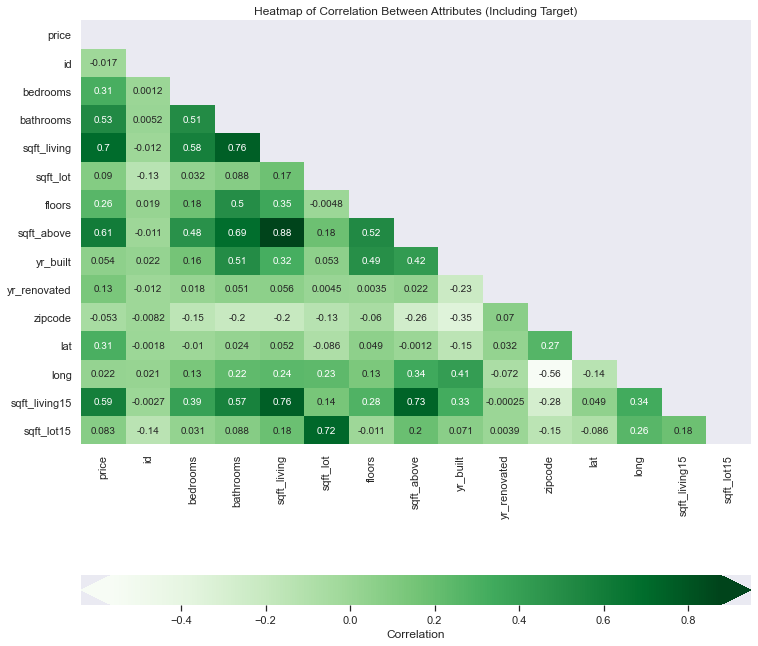

In [192]:
heatmap_data = pd.concat([y_train, X_train], axis=1)
corr = heatmap_data.corr()

fig, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(

    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    ax=ax,
    annot=True,
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"},
    cmap='Greens'
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

In [193]:
salecorr = df.corr()['price'].map(abs).sort_values(ascending=False)
salecorr

price            1.000000
sqft_living      0.701917
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
bedrooms         0.308787
lat              0.306692
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
zipcode          0.053402
long             0.022036
id               0.016772
Name: price, dtype: float64

In [194]:
most_correlated_feature = 'sqft_living'

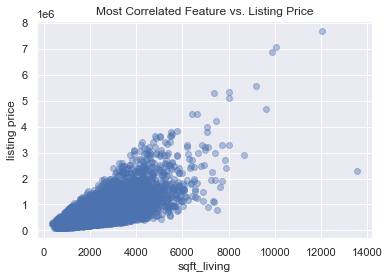

In [195]:
fig, ax = plt.subplots()

ax.scatter(X_train[most_correlated_feature], y_train, alpha=0.40)
ax.set_xlabel(most_correlated_feature)
ax.set_ylabel("listing price")
ax.set_title("Most Correlated Feature vs. Listing Price");

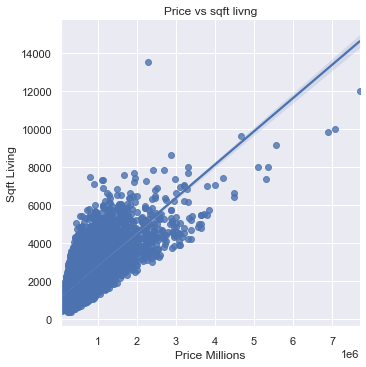

In [196]:
sns.lmplot(data=df, x='price', y='sqft_living')
plt.xlabel('Price Millions')
plt.ylabel('Sqft Living')
plt.title('Price vs sqft livng');

In [197]:
baseline_model = LinearRegression()

In [198]:
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.48774659364870426
Validation score: 0.5024006604207556


In [200]:
X_train_numeric = X_train.select_dtypes(include=['int64', 'float64'])
X_train_non_numeric = X_train.select_dtypes(exclude=['int64', 'float64'])
X_train_non_numeric

,date,waterfront,view,condition,grade,sqft_basement
0,10/13/2014,NaN,NONE,Average,7 Average,0.0
1,12/9/2014,NO,NONE,Average,7 Average,400.0
2,2/25/2015,NO,NONE,Average,6 Low Average,0.0
3,12/9/2014,NO,NONE,Very Good,7 Average,910.0
4,2/18/2015,NO,NONE,Average,8 Good,0.0
...,...,...,...,...,...,...
21592,5/21/2014,NO,NONE,Average,8 Good,0.0
21593,2/23/2015,NO,NONE,Average,8 Good,0.0
21594,6/23/2014,NO,NONE,Average,7 Average,0.0
21595,1/16/2015,NaN,NONE,Average,8 Good,0.0


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


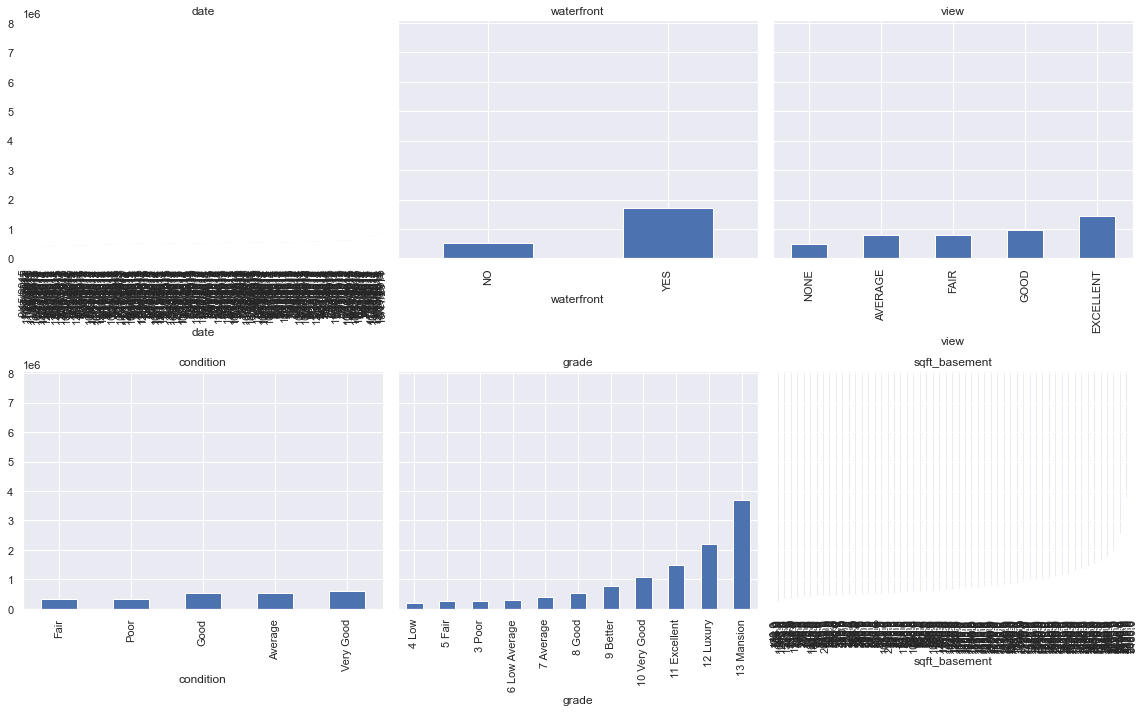

In [201]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,10), sharey=True)

categoricals = ['date', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement']

for col, ax in zip(categoricals, axes.flatten()):
    (train.groupby(col)              
         .mean()['price']       
         .sort_values()              
         .plot
         .bar(ax=ax))                
    
    ax.set_title(col)               
    
fig.tight_layout()

In [220]:
X_train["yr_renovated"] = X_train["yr_renovated"].fillna(0)
X_train["yr_renovated"] = X_train.loc[~(df==0).all(axis=1)]

In [221]:
X_train

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,7129300520,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,6414100192,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,5631500400,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,2487200875,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,1954400510,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,263000018,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,6600060120,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,1523300141,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,3,2.50,1600,2388,2.0,NaN,NONE,Average,8 Good,1600,0.0,2004,291310100,98027,47.5345,-122.069,1410,1287


# Drop data and sqft_basement(not categorical)

In [207]:
dummies = pd.get_dummies(train[categoricals], prefix=categoricals, drop_first=True)

df_preprocessed = train.drop(categoricals, axis=1)

df_preprocessed = pd.concat([df_preprocessed, dummies], axis=1)

df_preprocessed.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,...,sqft_basement_930.0,sqft_basement_935.0,sqft_basement_940.0,sqft_basement_946.0,sqft_basement_950.0,sqft_basement_960.0,sqft_basement_970.0,sqft_basement_980.0,sqft_basement_990.0,sqft_basement_?
0,7129300520,221900.0,3,1.00,1180,5650,1.0,1180,1955,0.0,...,0,0,0,0,0,0,0,0,0,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,2170,1951,1991.0,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,180000.0,2,1.00,770,10000,1.0,770,1933,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,1050,1965,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,1680,1987,0.0,...,0,0,0,0,0,0,0,0,0,0


In [235]:
price = np.log(df['price']).mean()
logsqft_living = np.log(df['sqft_living']).mean()


(13.048210941923953, 7.55072043366944)